In [1]:
import torch

In [2]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to /root/.cache/torch/hub/checkpoints/unet-e012d006.pt


In [3]:
import urllib.request
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
urllib.request.urlretrieve(url, filename)

('TCGA_CS_4944.png', <http.client.HTTPMessage at 0x7f937cf3f650>)

In [4]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
!pip install captum
from captum.attr import visualization as viz
from captum.attr import DeepLift

import matplotlib.pyplot as plt 

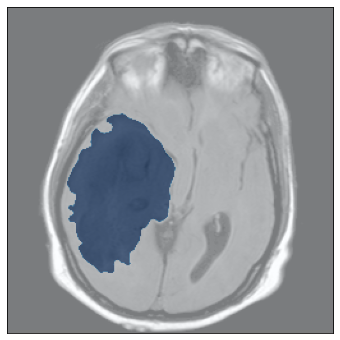

In [6]:
_ = viz.visualize_image_attr(output[0].cpu().permute(1, 2, 0).detach().numpy(),
                                     original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),
                                     method="blended_heat_map")


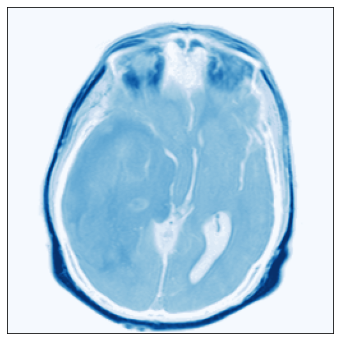

In [ ]:
_ = viz.visualize_image_attr(input_tensor.cpu().permute(1, 2, 0).detach().numpy())


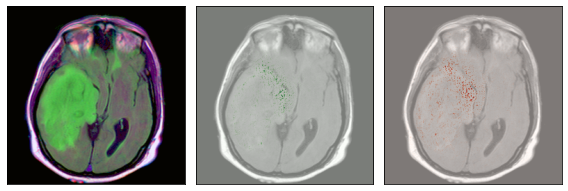

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c04ef3c50>,
       dtype=object))

In [ ]:
viz.visualize_image_attr_multiple(ziz.reshape(256, 256, 1),original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

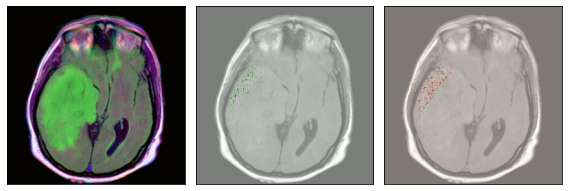

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c04650150>,
       dtype=object))

In [ ]:
viz.visualize_image_attr_multiple(ziz.reshape(256, 256, 1),original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

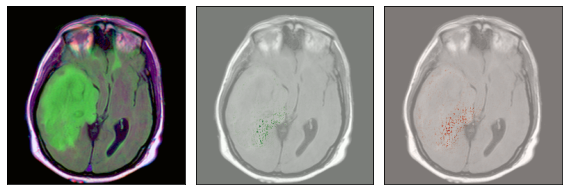

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c045e25d0>,
       dtype=object))

In [ ]:
viz.visualize_image_attr_multiple(ziz.reshape(256, 256, 1),original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

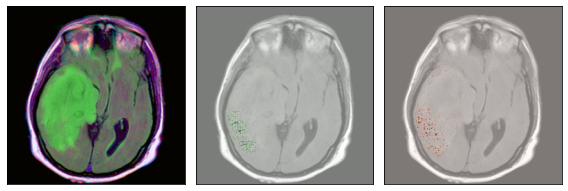

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c039b4490>,
       dtype=object))

In [ ]:
viz.visualize_image_attr_multiple(ziz.reshape(256, 256, 1),original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

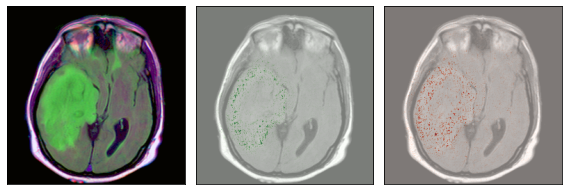

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c01fd55d0>,
       dtype=object))

In [ ]:
viz.visualize_image_attr_multiple(ziz.reshape(256, 256, 1),original_image=input_tensor.cpu().permute(1, 2, 0).detach().numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

In [ ]:
np.sum(j, 0).shape

(256, 256)

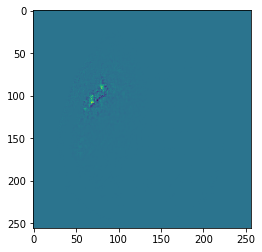

In [ ]:
plt.imshow(jj[0])

In [7]:
selected_pixels = []
threshold = 0.999999
for i in range(output[0][0].shape[0]):
  for j in range(output[0][0].shape[1]):
    if output[0][0][i, j] > threshold:
      selected_pixels.append((0, i, j))
len(selected_pixels)

1677

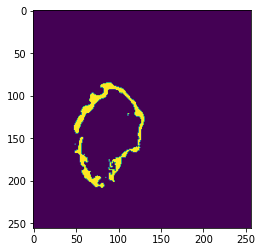

In [10]:
z = np.zeros([256, 256])
for i in selected_pixels:
  z[i[1], i[2]] = 1
plt.imshow(z)

In [18]:
from captum.metrics import infidelity

In [14]:
model = model

In [15]:
attribution = dl.attribute(input_batch.to(device), target=(0, 100, 100), return_convergence_delta=False).detach().cpu().numpy()[0]

/usr/local/lib/python3.7/dist-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:325: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [16]:
def perturb_fn(inputs):
   noise = torch.tensor(np.random.normal(0, 0.003, inputs.shape)).float()
   return noise, inputs - noise

In [27]:
infid = infidelity(model, perturb_fn, input_batch, attribution)

AssertionError: ignored

In [26]:
type()

tensor([0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
        0.0157, 0.0157, 0.0157, 0.0157, 

In [11]:
dl = DeepLift(model)
def dl_map(model, targets):
  maps = list()
  for target in targets:
    maps.append(np.mean(dl.attribute(input_batch.to(device), target=target, return_convergence_delta=False).detach().cpu().numpy()[0], 0, keepdims=True)[0])
  return np.array(maps)

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
j = dl_map(model, selected_pixels)

/usr/local/lib/python3.7/dist-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:325: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
a = np.max(np.abs(j[160]))
for k in range(len(j)):
  j[k] = j[k] * a/np.max(np.abs(j[k]))

In [ ]:
ziz = np.sum(j, 0)

In [ ]:
ziz.shape

(256, 256)

In [ ]:
jooj = np.sum(j, 0)

In [ ]:
zooz = np.zeros([256, 256])
for i in range(256):
  for j in range(256):
    if jooj[i, j] > 0:
      zooz[i,j] = 1
    elif jooj[i,j] <0:
      zooz[i,j] = -1
    else:
      zooz[i,j] = 0

In [ ]:
upl = []
upr = []
downl = []
downr = []

for pixel in selected_pixels:
  if pixel[1] < 150 and pixel[2] < 90:
    upl.append(pixel)
  elif pixel[1] < 150 and pixel[2] >= 90:
    upr.append(pixel)
  elif pixel[1] >= 150 and pixel[2] < 90:
    downl.append(pixel)
  elif pixel[1] >= 150 and pixel[2] >= 90:
    downr.append(pixel)

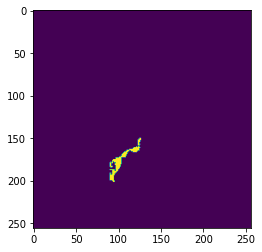

In [ ]:
z = np.zeros([256, 256])
for i in downr:
  z[i[1], i[2]] = 1
plt.imshow(z)

In [ ]:
jj = np.mean(j, 0, keepdims=True)

In [ ]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
input_tensor = preprocess(input_image)

In [ ]:
output[0][0].shape

torch.Size([256, 256])

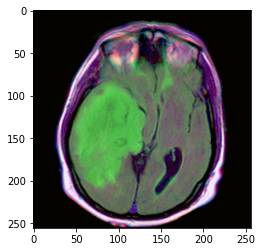

In [ ]:
plt.imshow(input_image)